In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('COVID-19-time-series-clean-complete.csv')
data.head()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0


In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data.head(2)

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0


In [6]:
data['MDate'] = data['Date'].map(lambda date : 100*date.year + date.month)
data.head(2)

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,MDate
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0,202001
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0,202001


In [7]:
data['Monthly_Case'] = data['New cases'] + data['New deaths']
data

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,MDate,Monthly_Case
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0,202001,0
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0,202001,0
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0,202001,0
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0,202001,0
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0,202001,0
...,...,...,...,...,...,...,...,...,...,...,...,...
108654,108654,2021-08-06,Vietnam,193381,3016,0.0,190365.0,4315,296,0,202108,4611
108655,108655,2021-08-06,West Bank and Gaza,317703,3611,0.0,314092.0,169,2,0,202108,171
108656,108656,2021-08-06,Yemen,7131,1384,0.0,5747.0,27,1,0,202108,28
108657,108657,2021-08-06,Zambia,199135,3459,0.0,195676.0,680,12,0,202108,692


In [8]:
percount = data.groupby(['Country/Region','MDate'])['Monthly_Case'].sum().reset_index()
fourth = percount.query('MDate == 202004')
fourth

,Country/Region,MDate,Monthly_Case
3,Afghanistan,202004,2012
23,Albania,202004,546
43,Algeria,202004,3696
63,Andorra,202004,399
83,Angola,202004,20
...,...,...,...
3763,Vietnam,202004,58
3783,West Bank and Gaza,202004,226
3803,Yemen,202004,8
3823,Zambia,202004,74


In [9]:
Result = fourth.sort_values(by=['Monthly_Case'],ascending=False).reset_index()
Result.head(8)

,index,Country/Region,MDate,Monthly_Case
0,3583,US,202004,949626
1,3663,United Kingdom,202004,164253
2,1223,France,202004,161136
3,3243,Spain,202004,143625
4,1683,Italy,202004,115210
5,3563,Turkey,202004,109633
6,2843,Russia,202004,105217
7,1303,Germany,202004,97049


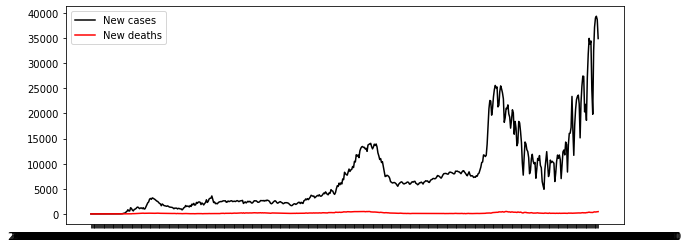

In [15]:
MY_Iran = data.loc[(data['Country/Region'] == 'Iran')]
plt.figure(figsize=(10,4))
plt.plot(MY_Iran['Date'].to_numpy(dtype=str),MY_Iran['New cases'], c='black', label='New cases' )
plt.plot(MY_Iran['Date'].to_numpy(dtype=str),MY_Iran['New deaths'], c='red',label='New deaths')
plt.legend()